###### Predicting customer churn using  machine learning algorithms to help businesses retain valueable customers.

In [50]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [51]:
# Load the dataset
customer_data = pd.read_csv(r'C:\Users\USER\Documents\Bank Customer Churn Prediction.csv')
# view the first five rows of the dataset
customer_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
# view the last five rows below of the dataset
customer_data.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [53]:
customer_data.set_index('customer_id').head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
# view the shape of the dataset
customer_data.shape

(10000, 12)

In [55]:
# view the type
type(customer_data)

pandas.core.frame.DataFrame

In [56]:
# Analyze the dataset
customer_data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory Data Analysis (EDA)

In [57]:
# check for missing values
customer_data.isna().any()

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [58]:
# view the columns
customer_data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

<AxesSubplot:>

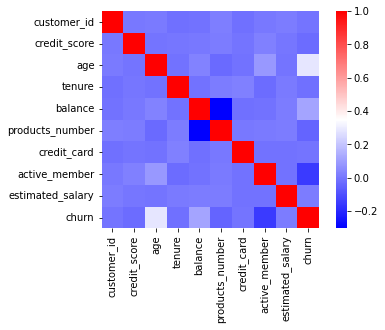

In [59]:
# identify correlation of the data using Heatmap
df = customer_data.corr()
sns.heatmap(df, square=True, cmap='bwr')

# Dealing with Outliers

<AxesSubplot:xlabel='age'>

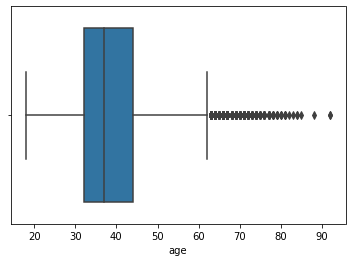

In [60]:
# detected outlier in the fourth column
sns.boxplot(customer_data['age'])

###### Data with age>60 is the outlier. Therefore filter accordingly

In [61]:
# outlier treatment
filter_age = customer_data['age'].values>60
df = customer_data[filter_age]
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
42,15687946,556,France,Female,61,2,117419.35,1,1,1,94153.83,0
44,15684171,660,Spain,Female,61,5,155931.11,1,1,1,158338.39,0
58,15623944,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,15805254,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,15804919,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1


In [63]:
 df.shape

(464, 12)

<AxesSubplot:xlabel='products_number'>

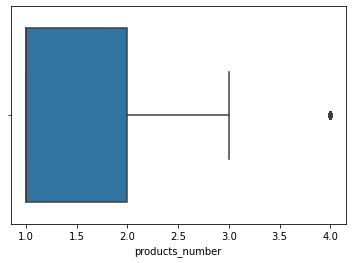

In [64]:
# detected outlier in the seventh column
sns.boxplot(customer_data['products_number'])

###### Data with product_number>3.0 is the outlier. Therefore filter accordingly

In [65]:
filter_products_number = df['products_number'].values<30
df = df[filter_products_number]
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
42,15687946,556,France,Female,61,2,117419.35,1,1,1,94153.83,0
44,15684171,660,Spain,Female,61,5,155931.11,1,1,1,158338.39,0
58,15623944,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,15805254,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,15804919,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1


In [66]:
df.shape

(464, 12)

# Correlation Analysis

In [67]:
#  use the corr() in Python to create correlation matrix
corr_matrix = df.corr()
corr_matrix

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,-0.011432,0.061446,0.055906,-0.103344,0.109287,0.040899,0.004035,0.006824,-0.007241
credit_score,-0.011432,1.000000,0.098370,0.002598,-0.033429,0.042308,-0.032091,0.074222,0.024077,-0.060418
age,0.061446,0.098370,1.000000,0.055129,-0.086541,0.014526,-0.002128,0.183899,0.019164,-0.297177
tenure,0.055906,0.002598,0.055129,1.000000,0.026561,-0.032692,0.052767,-0.043195,-0.010575,-0.033769
balance,-0.103344,-0.033429,-0.086541,0.026561,1.000000,-0.304653,-0.078390,-0.064241,0.046236,0.150381
products_number,0.109287,0.042308,0.014526,-0.032692,-0.304653,1.000000,0.025423,0.021006,0.096075,-0.012600
credit_card,0.040899,-0.032091,-0.002128,0.052767,-0.078390,0.025423,1.000000,-0.025088,0.056403,-0.014180
active_member,0.004035,0.074222,0.183899,-0.043195,-0.064241,0.021006,-0.025088,1.000000,-0.050077,-0.645833
estimated_salary,0.006824,0.024077,0.019164,-0.010575,0.046236,0.096075,0.056403,-0.050077,1.000000,0.019104
churn,-0.007241,-0.060418,-0.297177,-0.033769,0.150381,-0.012600,-0.014180,-0.645833,0.019104,1.000000


In [68]:
# We also use the round() function to round the output to two decimals:
round(corr_matrix, 2)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.00,-0.01,0.06,0.06,-0.10,0.11,0.04,0.00,0.01,-0.01
credit_score,-0.01,1.00,0.10,0.00,-0.03,0.04,-0.03,0.07,0.02,-0.06
age,0.06,0.10,1.00,0.06,-0.09,0.01,-0.00,0.18,0.02,-0.30
tenure,0.06,0.00,0.06,1.00,0.03,-0.03,0.05,-0.04,-0.01,-0.03
balance,-0.10,-0.03,-0.09,0.03,1.00,-0.30,-0.08,-0.06,0.05,0.15
products_number,0.11,0.04,0.01,-0.03,-0.30,1.00,0.03,0.02,0.10,-0.01
credit_card,0.04,-0.03,-0.00,0.05,-0.08,0.03,1.00,-0.03,0.06,-0.01
active_member,0.00,0.07,0.18,-0.04,-0.06,0.02,-0.03,1.00,-0.05,-0.65
estimated_salary,0.01,0.02,0.02,-0.01,0.05,0.10,0.06,-0.05,1.00,0.02
churn,-0.01,-0.06,-0.30,-0.03,0.15,-0.01,-0.01,-0.65,0.02,1.00


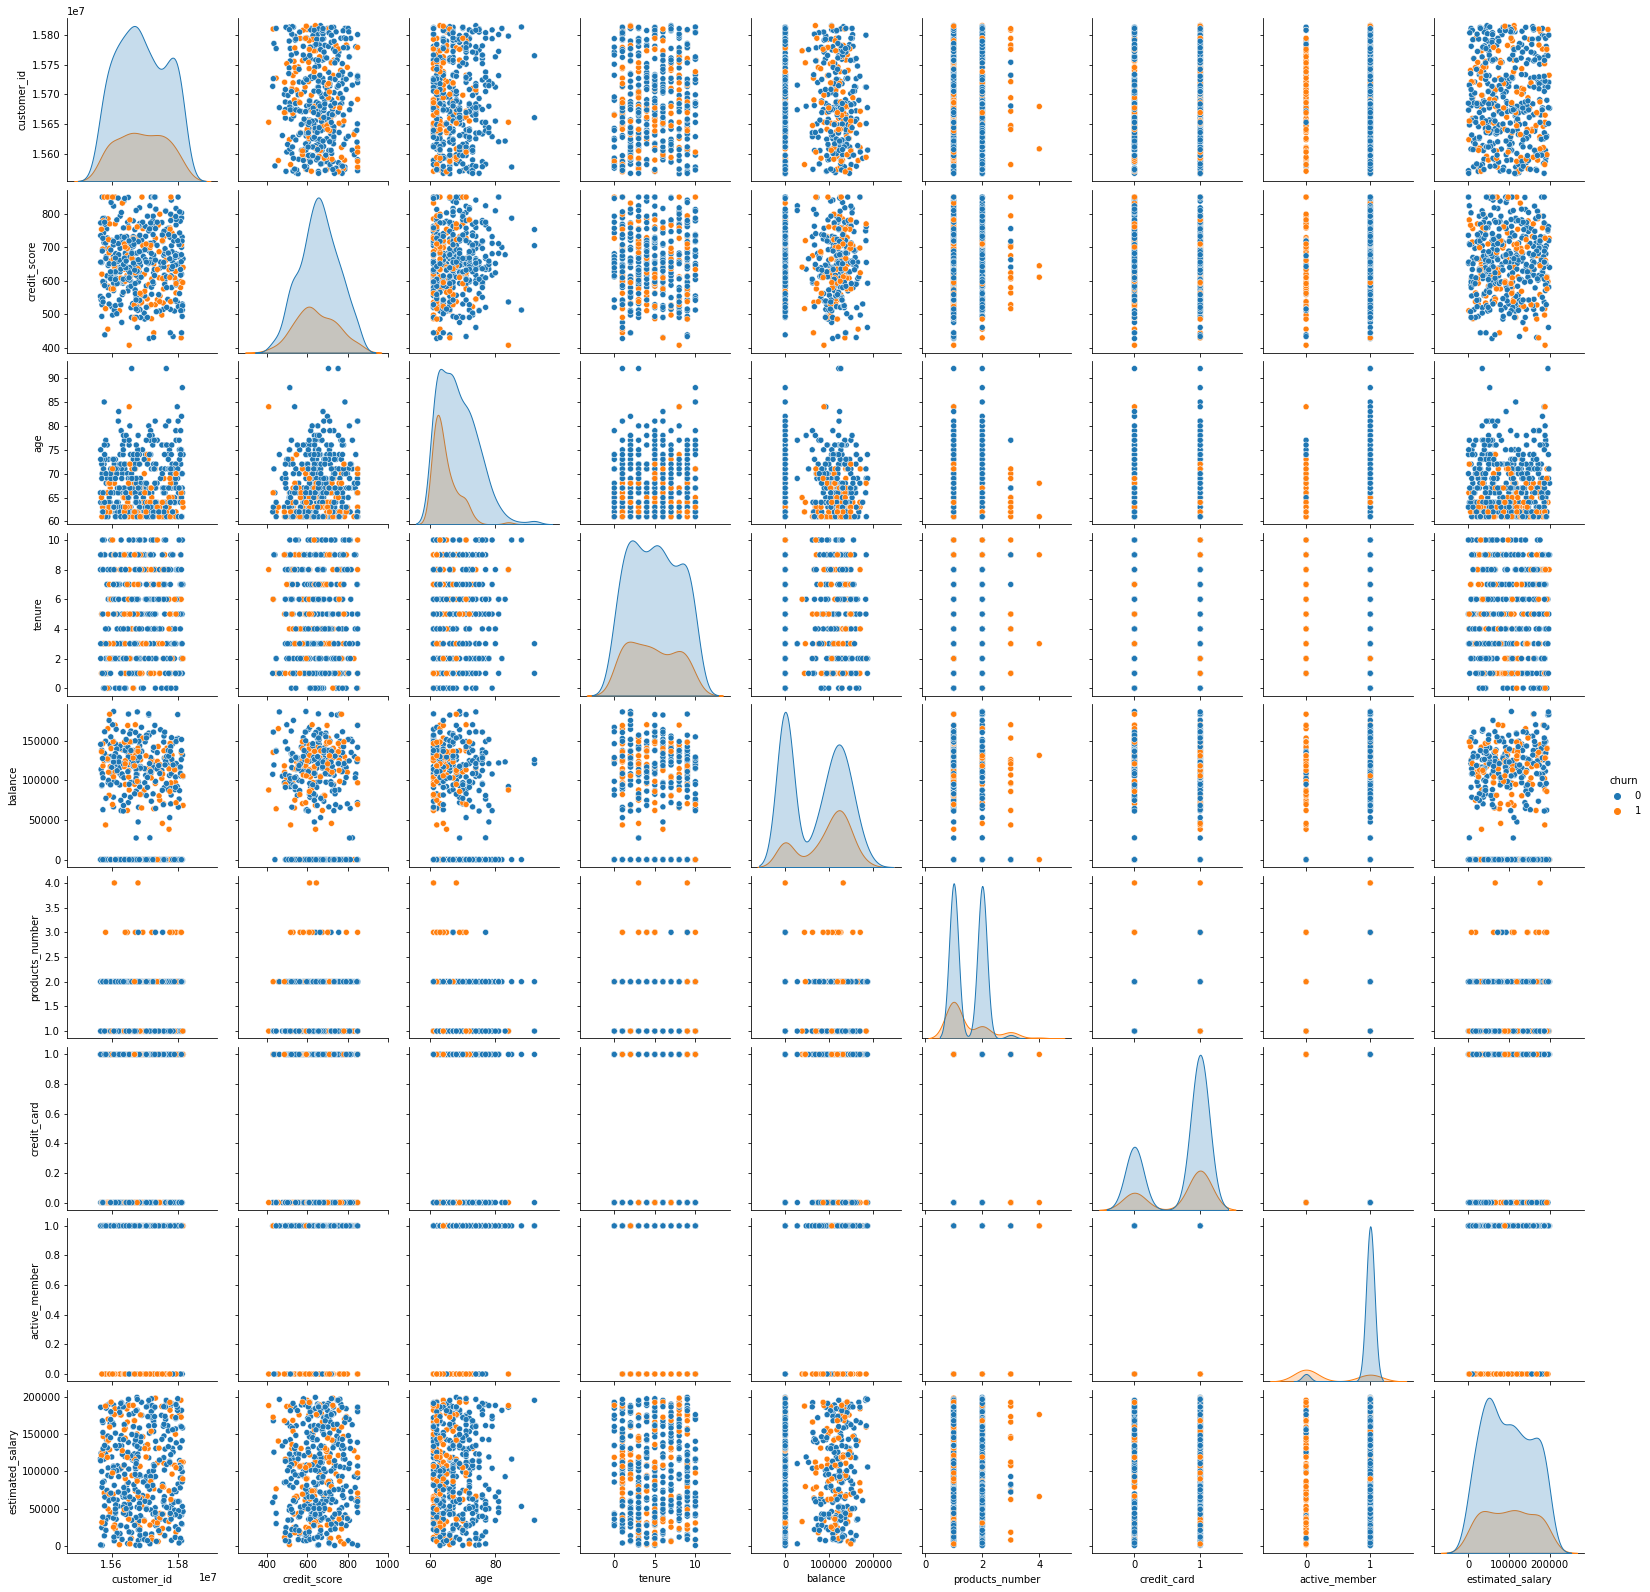

In [70]:
sns.pairplot(df, hue='churn')

# Processing the dataset

In [71]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [72]:
# label Encoding
le = preprocessing.LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
42,15687946,556,0,Female,61,2,117419.35,1,1,1,94153.83,0
44,15684171,660,2,Female,61,5,155931.11,1,1,1,158338.39,0
58,15623944,511,2,Female,66,4,0.00,1,1,0,1643.11,1
85,15805254,652,2,Female,75,10,0.00,2,1,1,114675.75,0
104,15804919,670,2,Female,65,1,0.00,1,1,1,177655.68,1


In [73]:
# Perform one-hot encoding
encoded_data = pd.get_dummies(df, columns=['gender']) 
encoded_data.head()

,customer_id,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male
42,15687946,556,0,61,2,117419.35,1,1,1,94153.83,0,1,0
44,15684171,660,2,61,5,155931.11,1,1,1,158338.39,0,1,0
58,15623944,511,2,66,4,0.00,1,1,0,1643.11,1,1,0
85,15805254,652,2,75,10,0.00,2,1,1,114675.75,0,1,0
104,15804919,670,2,65,1,0.00,1,1,1,177655.68,1,1,0


In [74]:
x = encoded_data.drop(columns=['churn'])
y = encoded_data['churn']

# Train and Test the Dataset

In [75]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1) 

In [76]:
# Scaling Numeric Features
scaler = preprocessing.StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

# Build Model and Predict the data

In [78]:
# import the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [80]:
predict = dtc.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest, predict))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       102
           1       0.64      0.66      0.65        38

    accuracy                           0.81       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.81      0.81      0.81       140



In [81]:
print(confusion_matrix(ytest, predict))

[[88 14]
 [13 25]]


In [82]:
from sklearn.metrics import accuracy_score
result = accuracy_score(ytest, predict)

In [84]:
round(result,2)

0.81

In [86]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [87]:
prediction = rfc.predict(xtest)
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       102
           1       0.86      0.63      0.73        38

    accuracy                           0.87       140
   macro avg       0.87      0.80      0.82       140
weighted avg       0.87      0.87      0.86       140



In [89]:
print(confusion_matrix(ytest, prediction))

[[98  4]
 [14 24]]


In [ ]:
accuracy = 